In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/Kmeans _clustering/income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income($)')

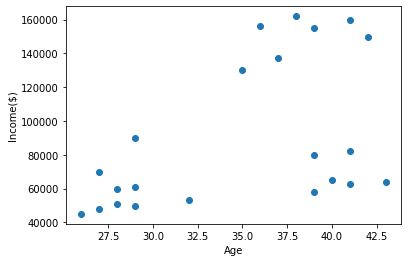

In [4]:
plt.scatter(df.Age,df["Income($)"])
plt.xlabel("Age")
plt.ylabel("Income($)")

In [5]:
km=KMeans(n_clusters=3)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [6]:
y_predicted=km.fit_predict(df[["Age","Income($)"]])

In [7]:
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [8]:
df["cluster"]=y_predicted

In [9]:
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [10]:
km.cluster_centers_

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

In [11]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]


No handles with labels found to put in legend.


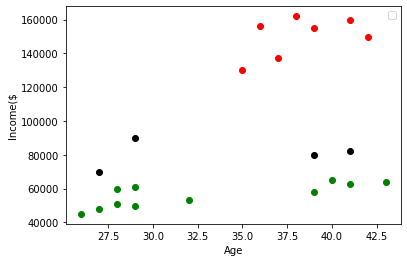

In [12]:
plt.scatter(df1.Age,df1["Income($)"],color="green")
plt.scatter(df2.Age,df2["Income($)"],color="red")
plt.scatter(df3.Age,df3["Income($)"],color="black")
plt.xlabel("Age")
plt.ylabel("Income($")
plt.legend()

In [13]:
Scaler=MinMaxScaler()
Scaler.fit(df[["Income($)"]])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [14]:
df["Income($)"]=Scaler.transform(df[["Income($)"]])

In [15]:
Scaler.fit(df[["Age"]])
df["Age"]=Scaler.transform(df[["Age"]])

In [16]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


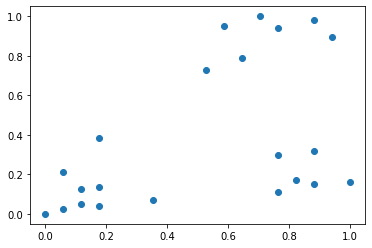

In [17]:
plt.scatter(df.Age,df["Income($)"])

In [18]:
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(df[["Age","Income($)"]])
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [19]:
df["cluster"]=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [20]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

No handles with labels found to put in legend.


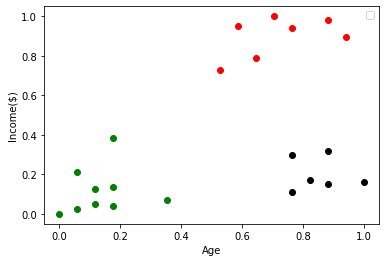

In [21]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

plt.scatter(df1.Age,df1["Income($)"],color="green")
plt.scatter(df2.Age,df2["Income($)"],color="red")
plt.scatter(df3.Age,df3["Income($)"],color="black")
plt.xlabel("Age")
plt.ylabel("Income($)")
plt.legend()


In [22]:
k_rng=range(1,10)
sse=[]

for k in k_rng:
  km=KMeans(n_clusters=k)
  km.fit(df[["Age","Income($)"]])
  sse.append(km.inertia_)

In [23]:
sse

[5.43401151198818,
 2.091136388699078,
 0.4750783498553096,
 0.3625079900797329,
 0.2818479744366238,
 0.22020960864009398,
 0.16858512236029757,
 0.14682060617795395,
 0.10188787724979426]

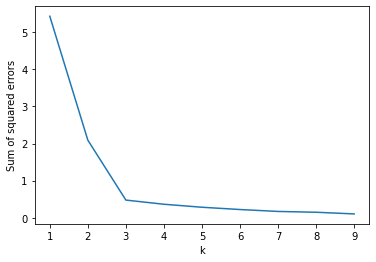

In [24]:
plt.xlabel("k")
plt.ylabel("Sum of squared errors")
plt.plot(k_rng,sse)